In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Supply Chain Data.csv')
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [5]:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    object 
 1   sku                      100 non-null    object 
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    object 
 7   stock_levels             100 non-null    int64  
 8   lead_times               100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    object 
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    object 
 14  location                 10

In [7]:
data.describe()

,price,availability,number_of_products_sold,revenue_generated,stock_levels,lead_times,order_quantities,shipping_times,shipping_costs,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,defect_rates,costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [8]:
data.isnull().sum()

product_type               0
sku                        0
price                      0
availability               0
number_of_products_sold    0
revenue_generated          0
customer_demographics      0
stock_levels               0
lead_times                 0
order_quantities           0
shipping_times             0
shipping_carriers          0
shipping_costs             0
supplier_name              0
location                   0
lead_time                  0
production_volumes         0
manufacturing_lead_time    0
manufacturing_costs        0
inspection_results         0
defect_rates               0
transportation_modes       0
routes                     0
costs                      0
dtype: int64


# 1. Product Type vs Number of Products Sold: 

Identifying bestsellers and underperforming products.


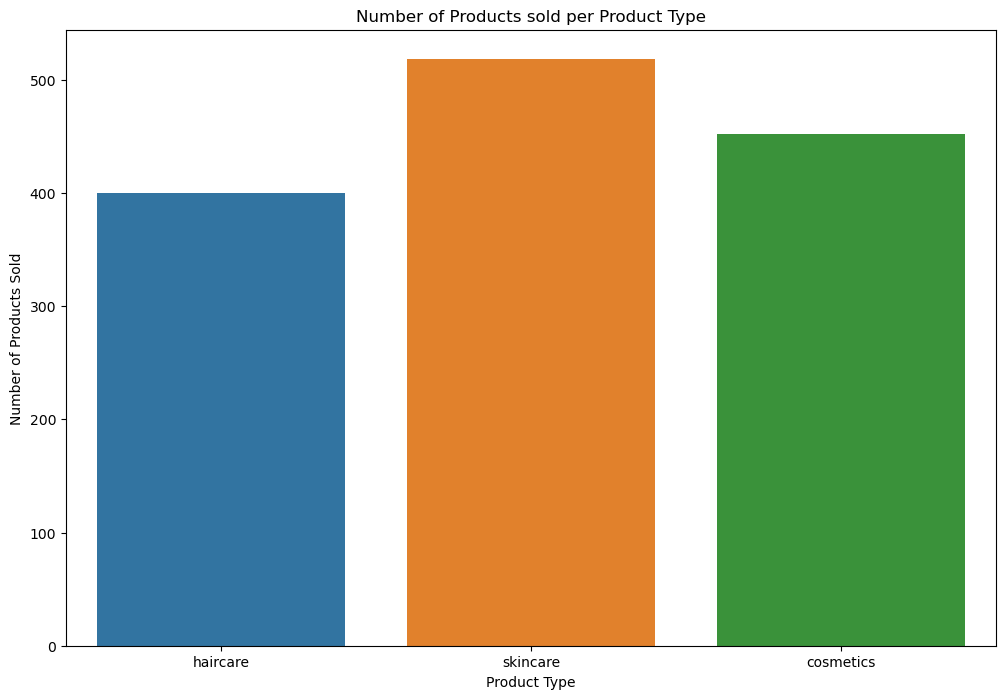

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data, x = 'product_type', y='number_of_products_sold', errorbar=None)
plt.xlabel("Product Type")
plt.ylabel("Number of Products Sold")
plt.title('Number of Products sold per Product Type')
plt.show()

# 2. Product Type vs Revenue Generated

Helps understanding product profitability.


[]

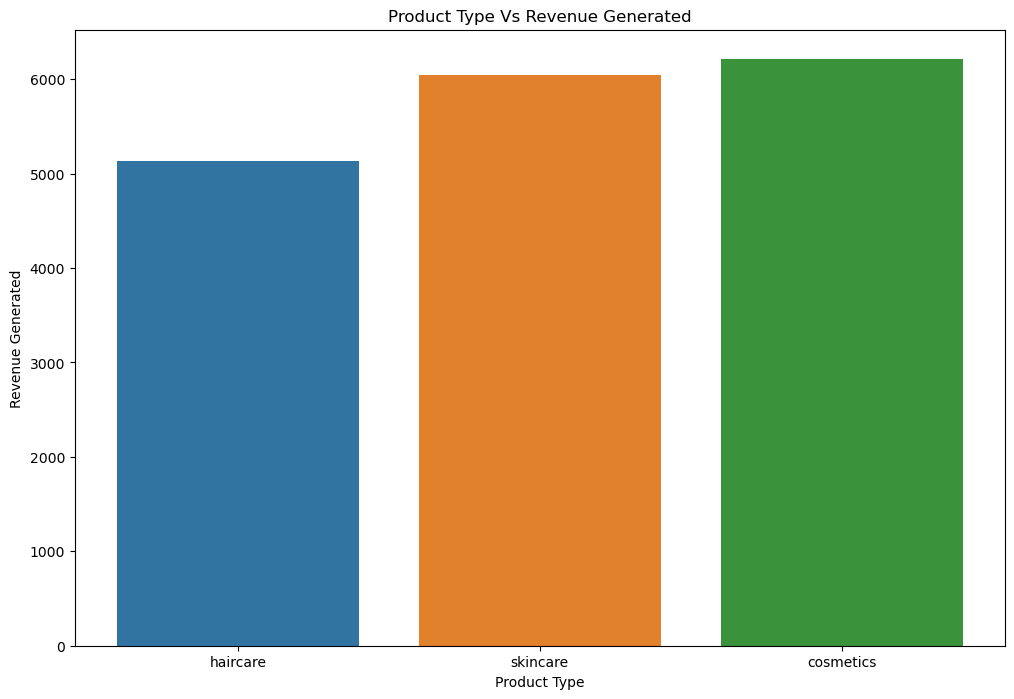

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data, x='product_type', y='revenue_generated', errorbar=None)
plt.xlabel("Product Type")
plt.ylabel('Revenue Generated')
plt.title("Product Type Vs Revenue Generated")
plt.plot()

# 3. Supplier Name vs Lead Time
Assessing supplier efficiency.

[]

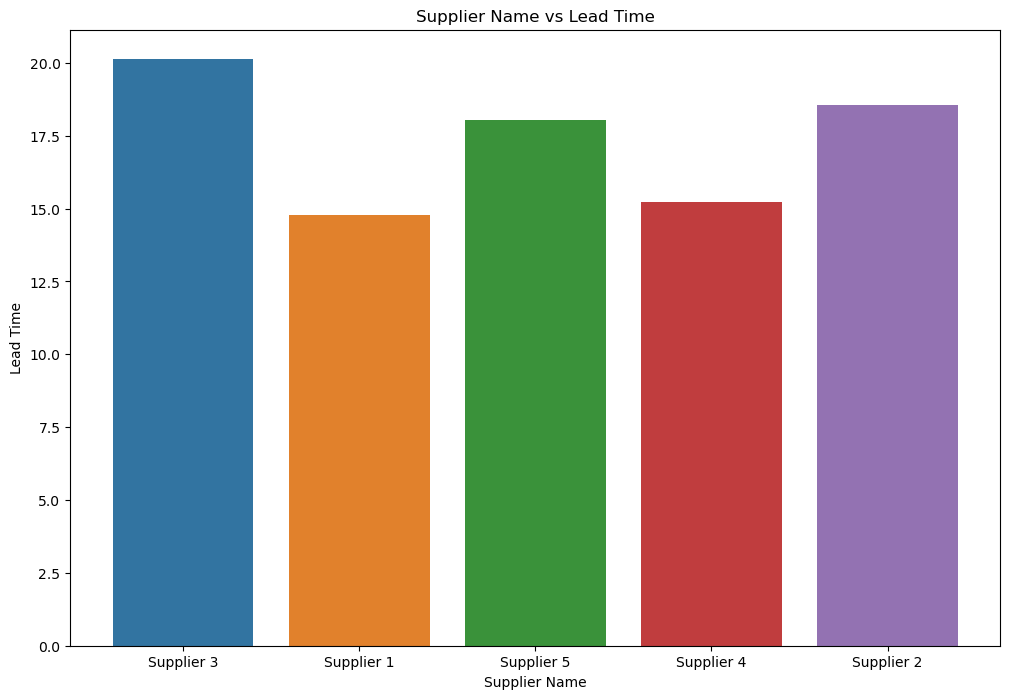

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(data = data, x='supplier_name', y='lead_time', errorbar=None)
plt.xlabel("Supplier Name")
plt.ylabel('Lead Time')
plt.title("Supplier Name vs Lead Time")
plt.plot()

# 4. Customer Demographics
Breakdown of customer base for targeted marketing.


In [12]:
customer_demo_counts = data.customer_demographics.value_counts()
customer_demo_counts

customer_demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

[]

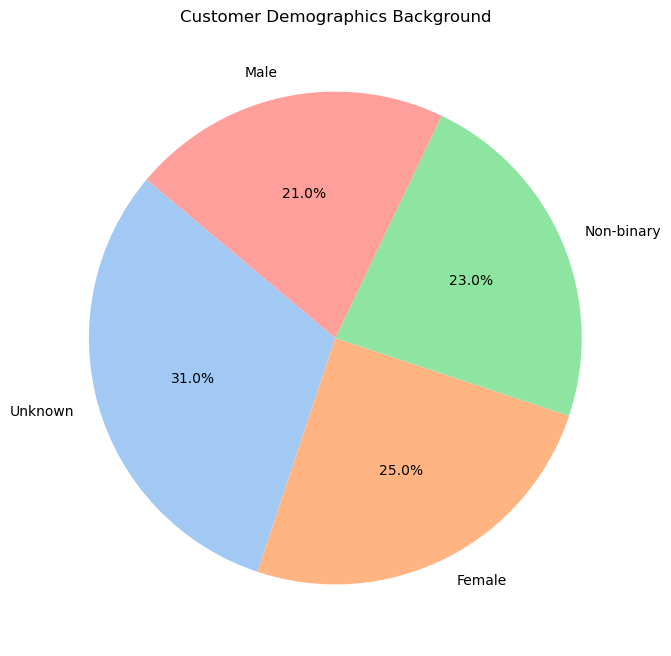

In [13]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(customer_demo_counts, 
        labels = customer_demo_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
       colors = colors)
plt.title("Customer Demographics Background")
plt.plot()

# 5. Defect Rates by Product Type
Identifying products with higher defect rates for quality control.

In [14]:
defect_rates = data.groupby('product_type')['defect_rates'].mean()
defect_rates

product_type
cosmetics    1.919287
haircare     2.483150
skincare     2.334681
Name: defect_rates, dtype: float64

[]

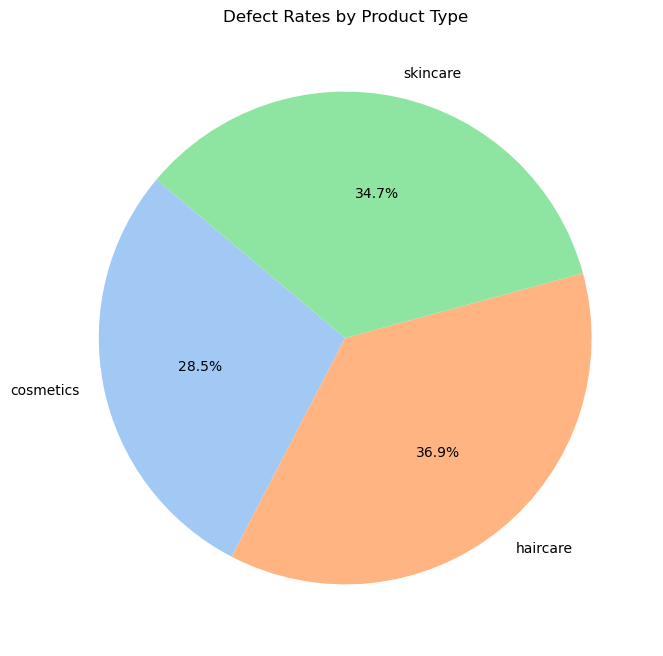

In [15]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(defect_rates, 
        labels = defect_rates.index, 
        autopct='%1.1f%%', 
        startangle=140, 
       colors = colors)
plt.title("Defect Rates by Product Type")
plt.plot()